<a href="https://colab.research.google.com/github/AimjGuytidy/pytorch-on/blob/main/lazy_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import torch
 import torch.nn as nn
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

## Regression with pytorch

In [2]:
# specify the sample size
N = 20
# create synthetic variable
X = np.random.random(N) * 10 - 5
# create target variable related to X
Y = 0.5*X - 1 + np.random.randn(N)

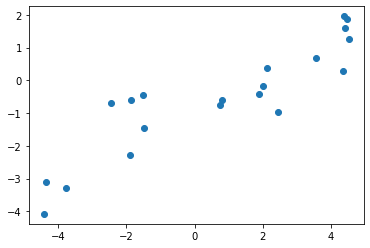

In [3]:
# let's visualize our data
plt.scatter(X,Y)

In [9]:
#create a model object
model = nn.Linear(1,1)
#create loss and optimizer objects
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
#reshape and convert variables into tensors
X = X.reshape(N,1)
Y = Y.reshape(N,1)
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))


In [5]:
type(inputs)

torch.Tensor

In [10]:
# Train the model
n_epochs = 30
losses = []
for i in range(n_epochs):
  # initialize the gradient parameters to zeros
  optimizer.zero_grad()
  #find the losses of the model
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  #keep the losses
  losses.append(loss.item())
  #backward and optimize the parameters
  loss.backward()
  optimizer.step()
  print(f"Epoch: {i+1}/{n_epochs}, Loss: {loss:.4f}")

Epoch: 1/30, Loss: 1.4345
Epoch: 2/30, Loss: 1.1308
Epoch: 3/30, Loss: 0.9359
Epoch: 4/30, Loss: 0.8104
Epoch: 5/30, Loss: 0.7292
Epoch: 6/30, Loss: 0.6764
Epoch: 7/30, Loss: 0.6416
Epoch: 8/30, Loss: 0.6185
Epoch: 9/30, Loss: 0.6028
Epoch: 10/30, Loss: 0.5918
Epoch: 11/30, Loss: 0.5840
Epoch: 12/30, Loss: 0.5781
Epoch: 13/30, Loss: 0.5736
Epoch: 14/30, Loss: 0.5699
Epoch: 15/30, Loss: 0.5668
Epoch: 16/30, Loss: 0.5641
Epoch: 17/30, Loss: 0.5617
Epoch: 18/30, Loss: 0.5595
Epoch: 19/30, Loss: 0.5574
Epoch: 20/30, Loss: 0.5555
Epoch: 21/30, Loss: 0.5536
Epoch: 22/30, Loss: 0.5519
Epoch: 23/30, Loss: 0.5502
Epoch: 24/30, Loss: 0.5486
Epoch: 25/30, Loss: 0.5471
Epoch: 26/30, Loss: 0.5456
Epoch: 27/30, Loss: 0.5442
Epoch: 28/30, Loss: 0.5428
Epoch: 29/30, Loss: 0.5415
Epoch: 30/30, Loss: 0.5402


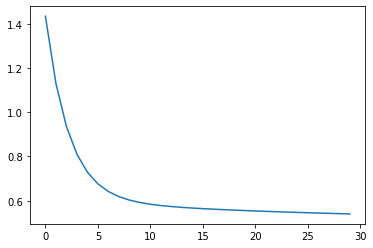

In [11]:
plt.plot(losses)

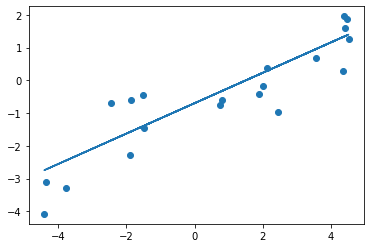

In [12]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label="Real values")
plt.plot(X,predicted,label="Predicted values")